## Steve Burton, Python FFT

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


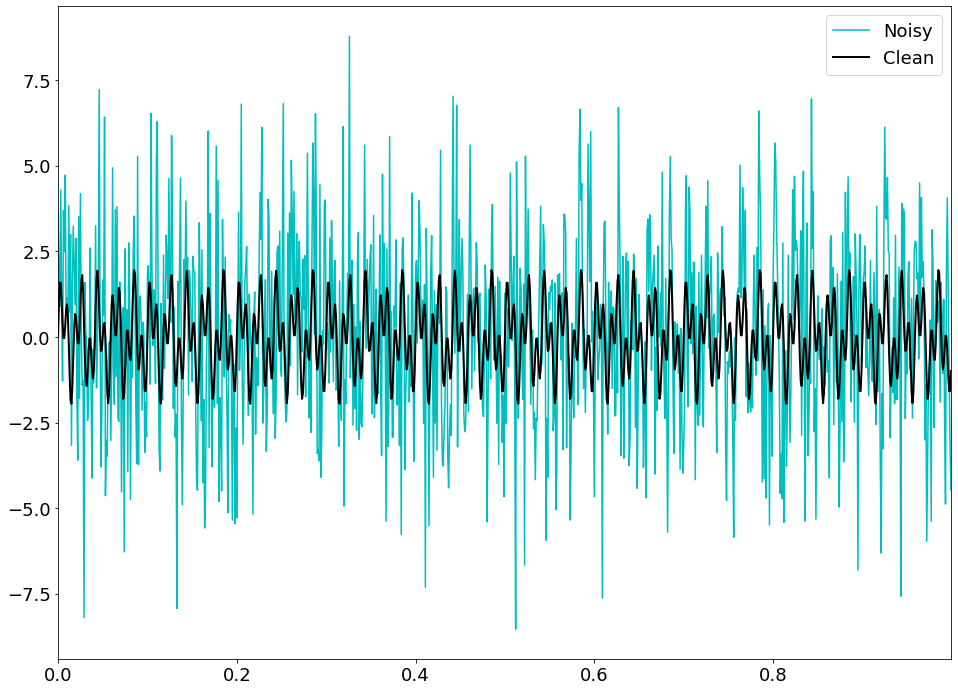

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


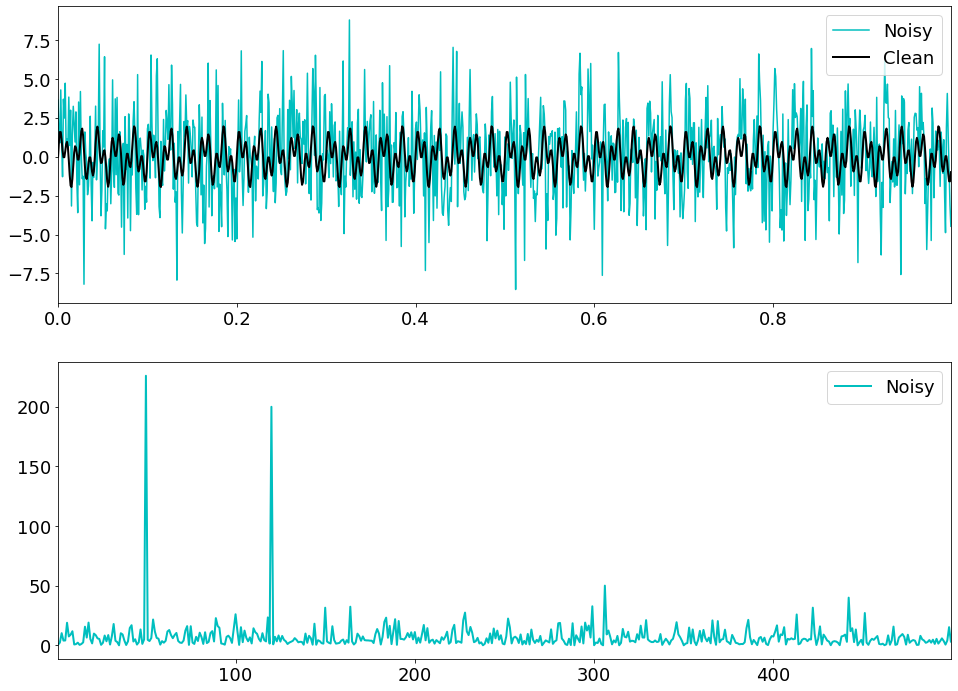

In [5]:
# Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)
# Power Spectral Density
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [6]:
## Uses the PSD to filter out noise

# Use boolean masking
indices = PSD > 100  # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat  # Zero out small Fourier foeefs in Y
ffilt = np.fft.ifft(fhat)  # Inverse FFT for filtered time signal

C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\matplotlib\cbook\__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\kdmen\miniconda3\envs\NSCenv\lib\site-packages\ipykernel_launcher.py:16: Matplotli

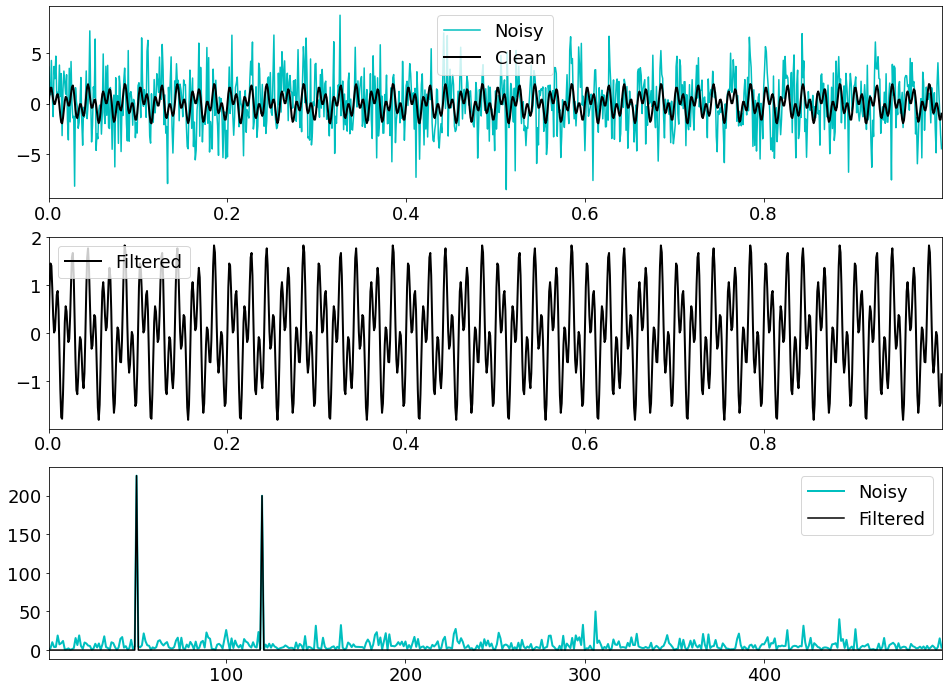

In [8]:
## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

## From's Kai's Mechatronics Project

In [ ]:
numDataPoints = 512 #Must be a power of 2
dataset = [0]*numDataPoints
sr = 9000 # Sampling Rate of the Arduino
# For a 16 MHz Arduino the ADC clock is set to 16 MHz/128 = 125 KHz
# Each conversion in AVR takes 13 ADC clocks so 125 KHz /13 = 9615 Hz
# This is the max possible, but there are delays due to run time and execution
# Solution is to toggle a digital pin every time you execute a conversion and
# measure the frequency that the digital pin toggles at
# Generally accepted to use 9000 Hz as the sampling rate

#Histories
totalTrials = 20
maxWaves = 10
alpha_Hist = np.zeros((totalTrials,maxWaves))
beta_Hist = np.zeros((totalTrials,maxWaves))

## VOID LOOP EQUIVALENT
currentTrial = 0
while currentTrial<totalTrials:
   userInput = input('Begin collecting samples? y/n: ')

   if userInput == 'n':
       print("Exiting function")
       currentTrial = totalTrials
       break
   elif userInput == 'y':
       numAlphas = 0
       numBetas = 0

       #Get data
       for i in range(0,numDataPoints):
           datapoint = int(getValues())
           dataset[i] = datapoint

       # Turn dataset into a signal
       x = dataset
       #DETREND: if we do not subtract the mean, then the a0 (DC value) of the FFT will be enormous
       # and completely shadow the rest of the values.  Thus we must "detrend" AKA "mean substract"
       xDetrended = [elem - sum(x)/len(x) for elem in x]
       # sampling interval
       ts = 1.0/sr
       t = range(numDataPoints)

       #Plot the raw signal (filter output)
       plt.figure(figsize = (14, 7))
       plt.tight_layout()
       plt.subplot(211)
       plt.plot(t, x, 'r')
       plt.ylabel('Amplitude')
       plt.xlabel('Time (sec)')
       plt.title('Raw Signal')

       #Plot the FFT
       ## NUMPY ##
       wD = np.fft.fft(xDetrended)
       freqsD = np.fft.fftfreq(len(xDetrended),1/sr)
       plt.subplot(212)
       plt.xlim(0,60)
       plt.xlabel('Freq (Hz)')
       plt.ylabel('FFT Amplitude |X(freq)|')
       plt.stem(freqsD, abs(wD), 'r')
       plt.title('Numpy, Detrended')

       ## SCIPY ##
       #Decided not to use since it isn't as reliable as Numpy
       """
       plt.subplot(122)
       plt.xlim(0,60)
       Xscipy_YFD = fft(xDetrended)
       Xscipy_XFD = fftfreq(len(Xscipy_YFD),1/sr)
       plt.xlabel('Freq (Hz)')
       plt.ylabel('FFT Amplitude |X(freq)|')
       plt.stem(Xscipy_XFD,Xscipy_YFD)
       plt.title('SciPy, Detrended')
       """

       #Get the mean energy present in the alpha range
       alpha = np.zeros((maxWaves))
       alphaIdx = sum(map(lambda x : x<13 and x>8, freqsD))
       if (isinstance(alphaIdx, (int, np.integer))):
           alpha[numAlphas] = wD[alphaIdx]
           numAlphas += 1
       elif (len(alphaIdx) != 0):
           for i in range(len(alphaIdx)):
               alpha[numAlphas] = wD[alphaIdx[i]]
               numAlphas += 1
       #Repeat for beta
       beta = np.zeros((maxWaves))
       betaIdx = sum(map(lambda x : x<13 and x>8, freqsD))
       if (isinstance(betaIdx, (int, np.integer))):
           beta[numBetas] = wD[betaIdx]
           numBetas += 1
       elif (len(alphaIdx) != 0):
           for i in range(len(betaIdx)):
               beta[numBetas] = wD[betaIdx[i]]
               numBetas += 1

       #Record the average energy in each range for each trial
       alpha_Hist[currentTrial,:] = alpha
       beta_Hist[currentTrial,:] = beta

       #Find the current and running averages so that we can compare them
       # Drop zero values so they don't factor into average calculation
       # (Zero values are from trials that haven't run yet)
       alpha_edited = [x for x in alpha if x != 0]
       alpha_current_AVG = np.mean(alpha_edited, axis=0)
       alpha_AVG_vec = np.mean(alpha_Hist, axis=1)
       print("The vector of average alphas (each row is a trial)")
       print(alpha_AVG_vec)
       alpha_SUM = 0
       total = 0
       for i in range(len(alpha_AVG_vec)):
           if alpha_AVG_vec[i] != 0:
               alpha_SUM += alpha_AVG_vec[i]
               total += 1
       if total > 0:
           alpha_AVG = alpha_SUM/total
       else:
           alpha_AVG = 0
       print("Alpha Average: ")
       print(alpha_AVG)
       #Repeat but for beta waves now
       beta_edited = [x for x in beta if x != 0]
       beta_current_AVG = np.mean(beta_edited, axis=0)
       beta_AVG_vec = np.mean(beta_Hist, axis=1)
       print("The vector of average betas (each row is a trial)")
       print(beta_AVG_vec)
       beta_SUM = 0
       total = 0
       for i in range(len(beta_AVG_vec)):
           if beta_AVG_vec[i] != 0:
               beta_SUM += beta_AVG_vec[i]
               total += 1
       if total > 0:
           beta_AVG = beta_SUM/total
       else:
           beta_AVG = 0
       print("Beta Average: ")
       print(beta_AVG)

       currentTrial = currentTrial + 1
       plt.show()